# Simple charts with Matplotlib

This tutorial shows examples of creating simple charts with the `matplotlib` package. Data for these charts are manually calculated, for example, with the `numpy` package. Many exercises require mathematical manipulations, which are demonstrated by visualizations in the end.

As a prerequisite, basic knowledge of the python programming language, the `numpy` package, and Jupyter notebook management is required.

The required packages can be imported as follows. `np` and `plt` are de-facto standards for using `numpy` and `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Line charts

A range of equidistant $x$ values is created, and basic functions ($\sin x$ and $\cos x$) over these values are displayed by the following code. The procedure is done in multiple steps to observe the effect of each.

In [2]:
x = np.arange(-10, 10, 0.1, dtype=float)
y1 = np.sin(x)
y2 = np.cos(x)

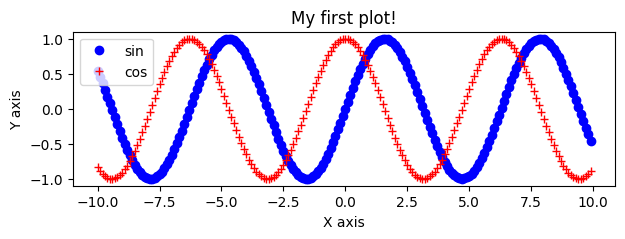

In [3]:
fig, ax = plt.subplots(figsize=(7,2))
ax.plot(x, y1, 'bo', label='sin')
ax.plot(x, y2, 'r+', label='cos')
ax.legend()
ax.set_title("My first plot!")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
# fig.show()
plt.show()

The code above demonstrates the object-oriented interface of `matplotlib`. This interface is essential for creating subplots with multiple axes objects.

The **Figure** object represents the whole image.

The **Axes** object represents each individual chart in the figure. Note that each axes object may contain multiple plots, as shown in the above example.

`matplotlib` also has a state-based interface, which is demonstrated below.

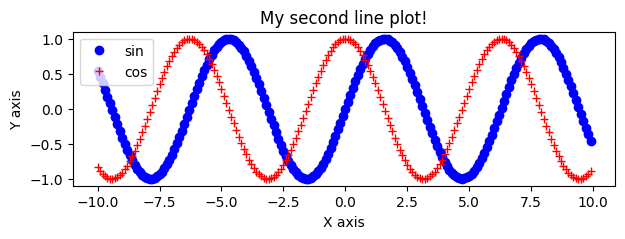

In [4]:
plt.subplots(figsize=(7,2))
plt.plot(x, y1, 'bo', label='sin')
plt.plot(x, y2, 'r+', label='cos')
plt.legend()
plt.title("My second line plot!")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

Note: `plt.show()` is the preferred way of displaying the plots, even if the object-oriented interface is used. It displays all open figures, and is handled by the backed event loop.

`fig.show()` can also work. It is mainly for interactive backends.

### Exercise (Line charts) 1.

Use a green line to display the $\sin$ function between $-2\pi$ and $2\pi$.

Hint: Try `np.linspace()` instead of `np.arange()`, and the "g-" format for plotting.

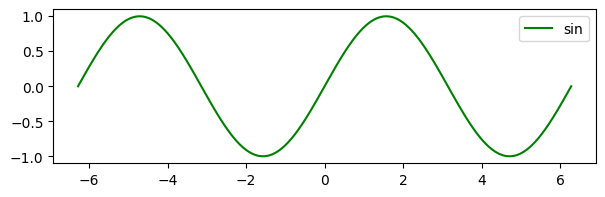

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000, dtype=float)
y1 = np.sin(x)
fig, ax = plt.subplots(figsize=(7,2))
ax.plot(x, y1, 'g-', label='sin')
ax.legend()
plt.show()

### Exercise (Line charts) 2.

Prove graphically that the $\sin$ and $\cos$ curves coincide when shifting one of them by $\frac{1}{2}\pi$.

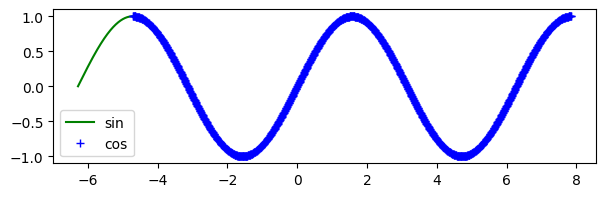

In [6]:
x1 = np.linspace(-2*np.pi, 2*np.pi, 1000, dtype=float)
y1 = np.sin(x1)
x2 = x1 + np.pi/2
y2 = np.cos(x1)
fig, ax = plt.subplots(figsize=(7,2))
ax.plot(x1, y1, 'g-', label='sin')
ax.plot(x2, y2, 'b+', label='cos')
ax.legend()
plt.show()

# Multiple axes objects


A figure can contain multiple axes objects. The `subplots()` function can set the number and layout of axes, their size and other options.

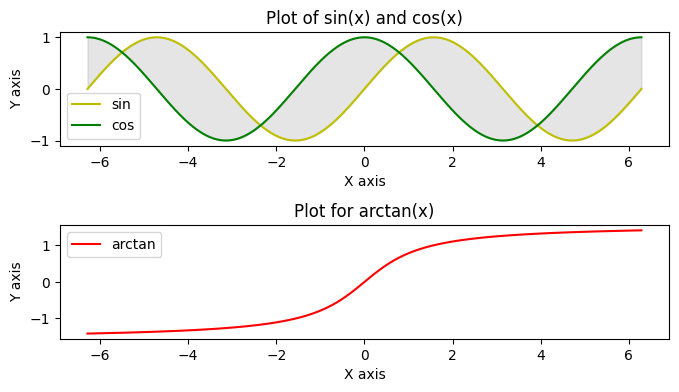

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000, dtype=float)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.arctan(x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,4))
ax1.plot(x, y1, 'y-', label='sin')
ax1.plot(x, y2, 'g-', label='cos')
ax1.legend()
ax1.set_title("Plot of sin(x) and cos(x)")
ax1.set_xlabel("X axis")
ax1.set_ylabel("Y axis")
ax1.fill_between(x, y1, y2, color='gray', alpha=0.2)
ax2.plot(x, y3, 'r-', label='arctan')
ax2.legend()
ax2.set_title("Plot for arctan(x)")
ax2.set_xlabel("X axis")
ax2.set_ylabel("Y axis")
fig.tight_layout(pad=1)
plt.show()

### Exercise (Multiple axes) 1.

Visualize the functions $x$, $x^2$, and $\sqrt{x}$ in a row of three distinct line charts.

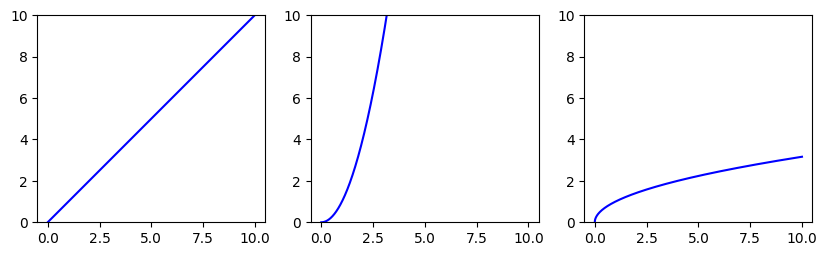

In [8]:
x = np.linspace(0, 10, 1000, dtype=float)
y1 = x
y2 = x**2
y3 = np.sqrt(x)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.plot(x, y1, 'b-', label='x')
ax2.plot(x, y2, 'b-', label='x^2')
ax3.plot(x, y3, 'b-', label='sqrt(x)')

ax1.set_ylim(0, 10)
ax1.set_aspect('equal')
ax2.set_ylim(0, 10)
ax2.set_aspect('equal')
ax3.set_ylim(0, 10)
ax3.set_aspect('equal')
plt.show()

### Exercise (Multiple axes) 2.

Graphically find the roots of the equation $12(x^2-5.5) = x(x^2+5)$.

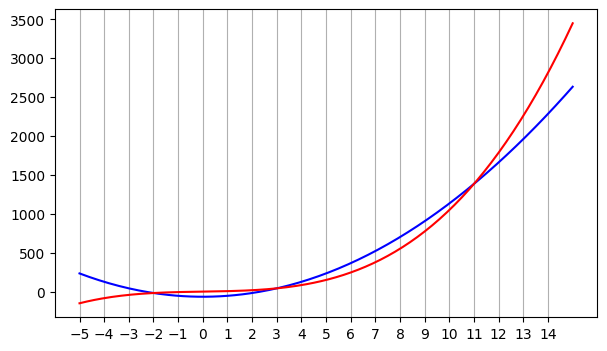

In [9]:
x = np.linspace(-5, 15, 201)
y1 = 12*(x**2-5.5)
y2 = x*(x**2+5)

fig, ax = plt.subplots(figsize=(7,4))
xticks = np.arange(-5, 15)
ax.set_xticks(xticks) # minor=True
ax.plot(x, y1, 'b-', label='y1')
ax.plot(x, y2, 'r-', label='y2')
ax.grid(axis='x')
plt.show()

# Bar charts

## Generating random data

The following examples use random data. A fixed seed ensures the reproducibility of the results.

In [10]:
np.random.seed(12345678)

We will now generate and display a 100 dice rolls as a bar and a line plot.

In [11]:
dice = np.random.randint(1, 7, 100)
print(dice)
x, y = np.unique(dice, return_counts=True)
print(x, y)

[4 3 5 2 1 4 2 1 3 4 2 2 1 4 3 2 5 6 2 3 2 5 2 6 6 3 4 1 1 4 1 5 4 6 1 5 5
 3 1 1 1 1 4 2 6 3 5 4 2 5 2 3 3 2 1 6 2 2 6 3 6 4 1 2 2 2 1 4 6 1 1 2 6 5
 6 4 2 1 2 4 1 4 3 1 3 4 6 6 4 6 3 6 6 6 2 1 1 1 3 3]
[1 2 3 4 5 6] [22 21 15 16  9 17]


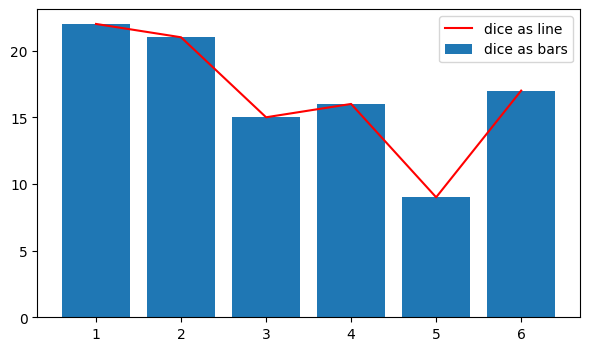

In [12]:
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(x, y, label="dice as bars")
ax.plot(x, y, 'r-', label="dice as line")
ax.legend()
plt.show()

## Stacked bar charts

Generate and display 3 (or more) dice roll series on a single *stacked* bar chart or *clustered* bar chart.

In [13]:
def to_full(x, y):
    full = np.zeros(6)
    for xi, yi in zip(x, y):
        full[xi - 1] = yi
    return full

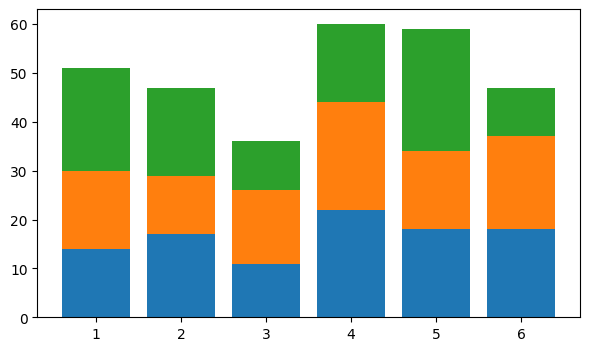

In [14]:
N = 100
dice = np.random.randint(1, 7, (3, N))
x0, y0 = np.unique(dice[0], return_counts=True)
x1, y1 = np.unique(dice[1], return_counts=True)
x2, y2 = np.unique(dice[2], return_counts=True)
fig, ax = plt.subplots(figsize=(7,4))
all_x = np.arange(1, 7)
y0_full = to_full(x0, y0)
y1_full = to_full(x1, y1)
y2_full = to_full(x2, y2)
ax.bar(all_x, y0_full)
ax.bar(all_x, y1_full, bottom=y0_full)
ax.bar(all_x, y2_full, bottom=y0_full+y1_full)
plt.show()

By simply plotting the bars onto each other, the result is incorrect because the bars overlap (in contrast to line plots).

Stacked bar charts can be obtained by manually altering the starting point of each bar after drawing the bar for each data series.

In [15]:
N = 100
columns = np.arange(1, 7)
dice = np.random.randint(1, 7, (3, N))
rolls = {
    # 'A' : np.unique(dice[0], return_counts=True)[1], # might cause problems
    'A' : ([dice[0].tolist().count(i) for i in columns]),
    'B' : ([(dice[1]==i).sum() for i in columns]),
    'C' : ([np.count_nonzero(dice[2]==i) for i in columns])
}
print(rolls)

{'A': [15, 15, 13, 18, 21, 18], 'B': [np.int64(11), np.int64(23), np.int64(13), np.int64(16), np.int64(20), np.int64(17)], 'C': [np.int64(12), np.int64(22), np.int64(17), np.int64(8), np.int64(22), np.int64(19)]}


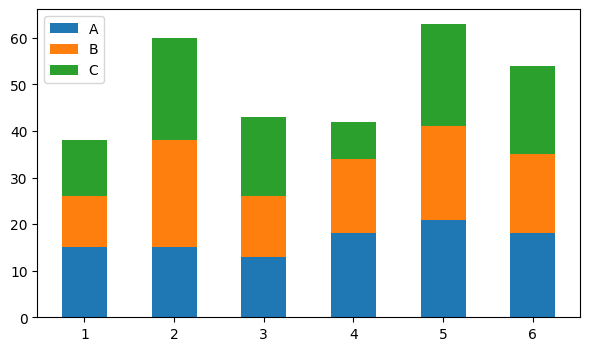

In [16]:
fig, ax = plt.subplots(figsize=(7,4))

bar_bottoms = np.zeros(len(columns))

for color, lengths in rolls.items():
  ax.bar(columns, lengths, width=0.5, label=color, bottom=bar_bottoms)
  bar_bottoms += lengths

ax.legend()
plt.show()

### Exercise (Bar charts) 1.

When and why can the line `np.unique(dice[0], return_counts=True)[1]` cause problems in the above code?

## Clustered bar charts

Clustered column charts can also be made manually, by shifting the starting point (x-axis) of the bars.

We first define a function for generating and displaying a single series.

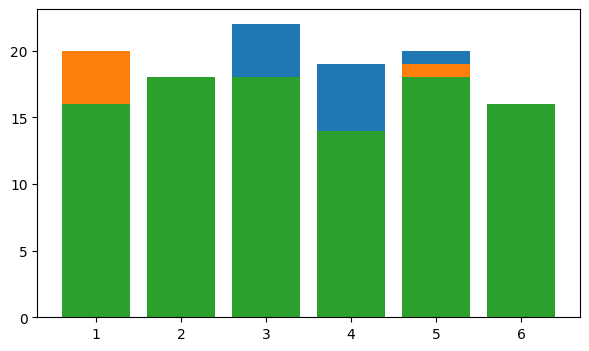

In [17]:
N = 100
fig, ax = plt.subplots(figsize=(7,4))

def plot_random_dice_series ():
  dice = np.random.randint(1, 7, N)
  x, y = np.unique(dice, return_counts=True)
  ax.bar(x, y)

plot_random_dice_series()
plot_random_dice_series()
plot_random_dice_series()

Then, a custom width and offset for each bar is added as follows.

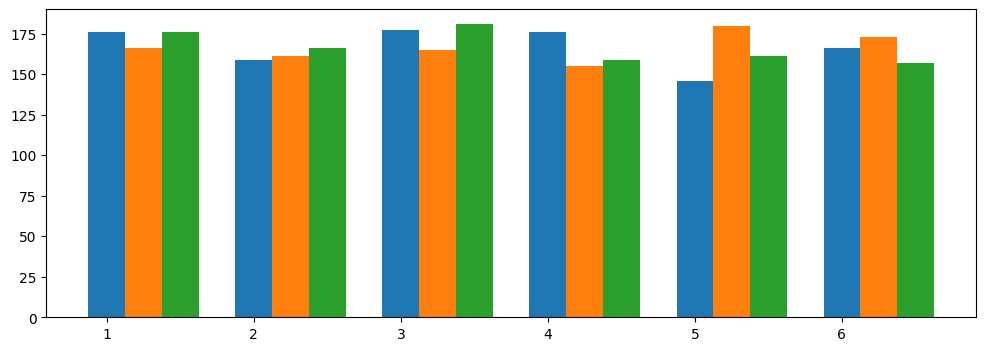

In [46]:
N = 1000
fig, ax = plt.subplots(figsize=(12,4))
width = 0.25

def plot_random_dice_series (index):
  dice = np.random.randint(1, 7, N)
  x, y = np.unique(dice, return_counts=True)
  ax.bar(x + index * width, y, width=width)

plot_random_dice_series(0)
plot_random_dice_series(1)
plot_random_dice_series(2)

Add a function for drawing multiple bars, and sizing the columns appropriately, including the offset of the ticks.

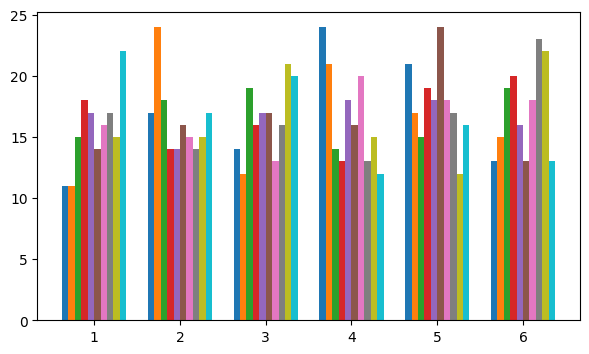

In [19]:
N = 100

fig, ax = plt.subplots(figsize=(7,4))

def plot_random_dice_series (index, width):
  dice = np.random.randint(1, 7, N)
  x, y = np.unique(dice, return_counts=True)
  ax.bar(x + width*index, y, width=width)

def plot_multi (K):
  padding = 0.25
  width = (1-padding)/K
  for index in range(K):
    plot_random_dice_series(index, width)
  x = np.arange(1, 7)
  ax.set_xticks(x + ((K-1)/2)*width)
  ax.set_xticklabels(x)

plot_multi(10)
plt.show()

### Exercise (Bar charts) 2.

Display a histogram for the normal distribution with mean 100 and standard deviation 15.

Hint: Use `np.random.normal()` and `np.round()`.

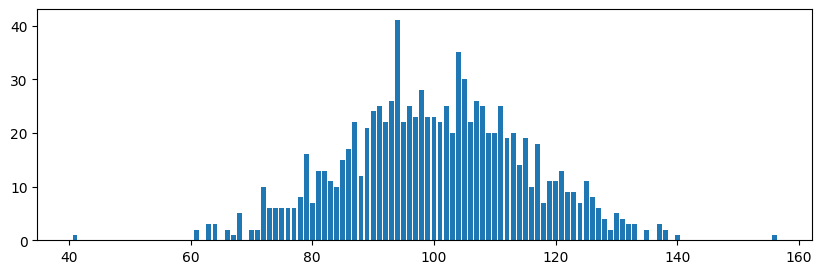

In [20]:
vals = np.random.normal(100, 15, 1000)
vals = np.round(vals)
x, y = np.unique(vals, return_counts=True)

fig, ax = plt.subplots(figsize=(10,3))
ax.bar(x, y)
plt.show()

### Exercise (Bar charts) 3.

Display 10 random numbers as a horizontal bar chart.

Hint: Use `barh()` instead of `bar()`.

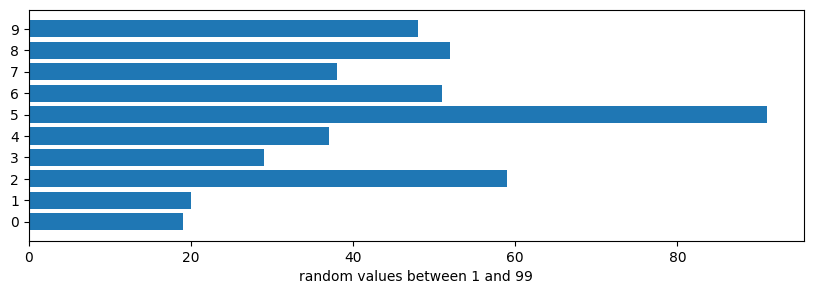

In [21]:
label_count = 10
y = np.arange(0, label_count)
x = np.random.randint(1, 100, label_count)

fig, ax = plt.subplots(figsize=(10,3))
ax.barh(y, x)
ax.set_yticks(y)
ax.set_xlabel("random values between 1 and 99")
plt.show()

### Exercise (Bar charts) 4.

Throw *two* dice at once 10000 times and display the distribution of the obtained sums as a horizontal bar chart.

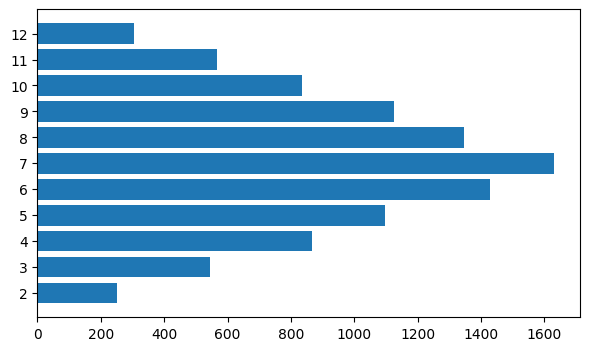

In [22]:
dice2 = np.random.randint(1, 7, (2, 10000))
sums = dice2[0] + dice2[1]
y, x = np.unique(sums, return_counts=True)

fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y, x)
ax.set_yticks(y)
plt.show()

# Pie charts and categorization

Pie charts require the array of labels and values, which can be calculated manually. Categorization and summarization can be performed manually.

In [23]:
text = "moszkvics luxusbusz slusszkulcs"
chars = list(set(text))
chars.sort()
#counts = np.asarray(list(map(lambda ch : text.count(ch), chars)))
counts = np.array([text.count(ch) for ch in chars])
print(chars)
print(counts)

[' ', 'b', 'c', 'i', 'k', 'l', 'm', 'o', 's', 'u', 'v', 'x', 'z']
[2 1 2 1 2 3 1 1 8 5 1 1 3]


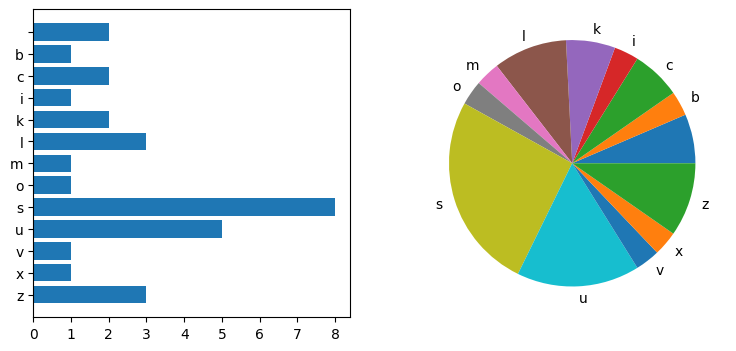

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
ax1.barh(chars, counts)
ax1.invert_yaxis()
ax1.set_xticks(np.arange(0, counts.max()+1))
ax2.pie(counts, labels=chars)
plt.show()

In the following example, the normal distribution with mean 100 and standard deviation 15 is displayed different ways:

1. Pie chart, displaying low, medium and high values.
2. Stairs chart.
3. Horizontal bar chart.
4. Histogram chart.

Note that the conditional categorization and the creation of the histogram is made manually.



In [25]:
vals = np.random.normal(100, 15, 1000)

labels = ('low', 'normal', 'high')
freq = np.array([
    (vals <= 70).sum(),
    ((vals > 70) & (vals <= 130)).sum(),
    (vals > 130).sum(),
])
# print(vals) # long
print(labels)
print(freq)

('low', 'normal', 'high')
[ 25 959  16]


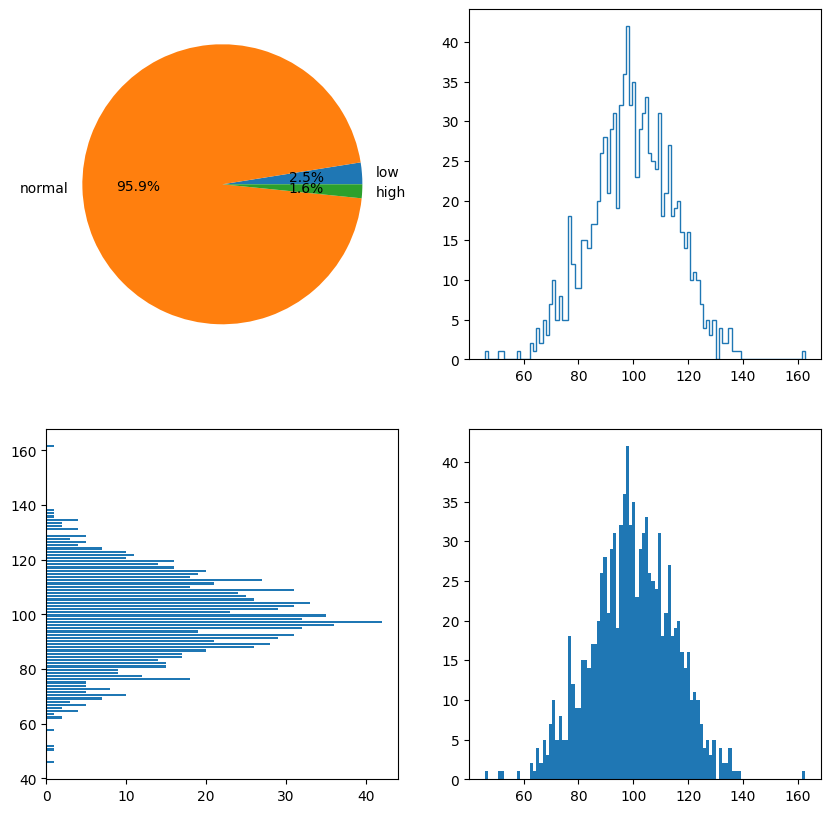

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.pie(freq, labels=labels, autopct='%1.1f%%')
hcounts, hbins = np.histogram(vals, 100)
#print(hcounts)
#print(hbins)
ax2.stairs(hcounts, hbins)
ax3.barh(hbins[:-1], hcounts)
ax4.hist(hbins[:-1], hbins, weights=hcounts)

plt.show()

### Exercise (Pie charts) 1.

Generate 100 random integers between 2 and 1000, an create a pie chart showing how many of them are *prime* and *composite*, including percentages.

The following function can be used for checking primes.

In [27]:
def is_prime (num):
  for i in range(2, int(np.sqrt(num))+1):
    if (num % i == 0):
      return 'composite'
  return 'prime'

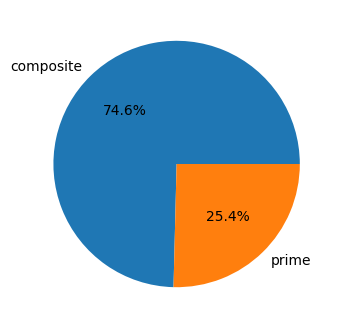

In [28]:
from math import sqrt

is_prime_v = np.vectorize(is_prime)

N = 1000
numbers = np.random.randint(2, 101, N)
labels, counts = np.unique(is_prime_v(numbers), return_counts=True)

fig, ax = plt.subplots(figsize=(4,4))
ax.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

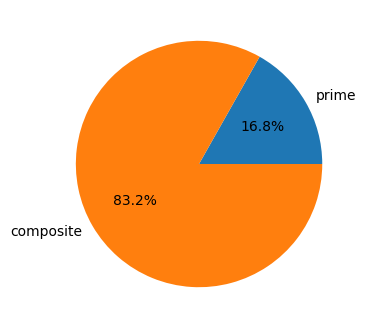

In [29]:
labels = ['prime', 'composite']
vals = [is_prime(num) for num in range(2, 1001)]
counts = [vals.count('prime'), vals.count('composite')]

fig, ax = plt.subplots(figsize=(7,4))
ax.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

# Scatter charts

Scatter charts are used to plot a collection of points. This can be used for different purposes:

*   To visualize the relationship between two numeric fields; or
*   To visualize 2D data. This is now demonstrated in this tutorial.

The following scatter chart shows a distribution of points over a unit disc. The distribution is uneven due to the way it was generated using polar coordinates.

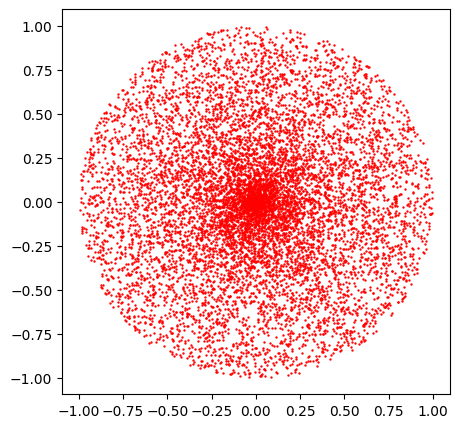

In [30]:
N = 10000
args = np.random.random_sample(N) * (2*np.pi)
radii = np.random.random_sample(N)
x = radii * np.cos(args)
y = radii * np.sin(args)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x, y, s=0.5, c='r')
plt.show()

### Exercise (Scatter charts) 1.

In the scatter chart above, why is the distribution of points more dense at the center?

## Pointwise categorization

There are generally two ways to further categorize the data points shown in a scatter chart. This is demonstrated on colors (note, it can also be done for e.g. point sizes as well).

First method: provide an array of colors with the same cardinality as the number of points.

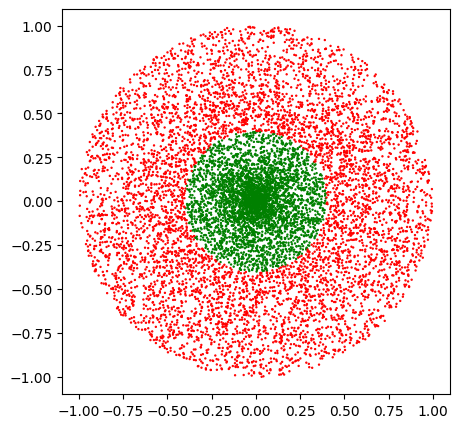

In [31]:
N = 10000
args = np.random.random_sample(N) * (2*np.pi)
radii = np.random.random_sample(N)
x = radii * np.cos(args)
y = radii * np.sin(args)
colors = ['g' if rad<0.4 else 'r' for rad in radii]
# print(colors) # long

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x, y, s=0.5, c=colors)
plt.show()

Second method: plot different sets of points as separate scatter charts on the same axes object.

The sets of points can be obtained by filtering the full set using a mask as shown below.

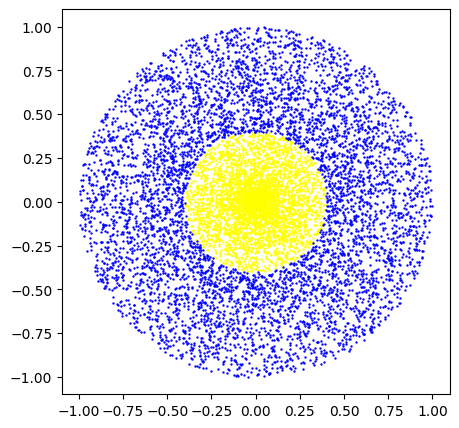

In [32]:
N = 10000
args = np.random.random_sample(N) * (2*np.pi)
radii = np.random.random_sample(N)
x = radii * np.cos(args)
y = radii * np.sin(args)
mask = x**2 + y**2 < 0.4**2
# print(mask) # long

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x[mask], y[mask], s=0.5, c='yellow')
ax.scatter(x[~mask], y[~mask], s=0.5, c='blue')
plt.show()

### Exercise (Scatter charts) 2.

Generate some random points of the form $(a^2+b^2+c^2, ab+bc+ca)$, to graphically prove the following statements.

If $-1\le a, b, c\le 1$, then:

*   $a^2+b^2+c^2 \ge ab+bc+ca$
*   $-\frac{1}{2}(a^2+b^2+c^2) \le ab+bc+ca$
*   $-1 \le ab+bc+ca$
*   $a^2+b^2+c^2 \le \frac{1}{4}(ab+bc+ca-1)^2+2$

Hint: `scatter()` is sufficient for the task, but `plot()`, `fill_between()`, or `fill_betweenx()` can make the result more readable.

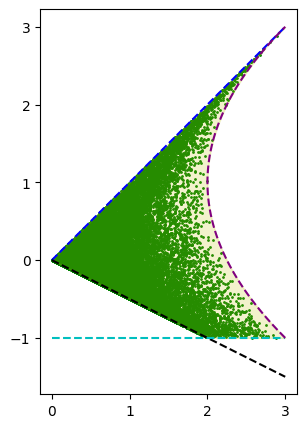

In [33]:
N = 25000
a, b, c = np.random.random_sample(size=(3, N)) * 2 - 1
x = a**2 + b**2 + c**2
y = a*b + b*c + c*a
mask = (x >= y) & (-x/2 <= y) & (-1 <= y) & (x <= 1/4*(y-1)**2+2)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x[mask], y[mask], s=1, color='green')
ax.scatter(x[~mask], y[~mask], s=100, color='red', marker='+') # no points
ax.set_aspect('equal')

px = np.linspace(0, 3, 1000)
ax.plot(px, 1.0*px, 'b--')
ax.plot(px, -0.5*px, 'k--')

qx = np.linspace(0, 3, 100)
qy = np.repeat(-1, 100)
ax.plot(qx, qy, 'c--')

ry = np.linspace(-1, 3, 100)
rx = 1/4 * (ry-1)**2 + 2
ax.plot(rx, ry, '--', color='purple')

ty = np.linspace(-1, 3, 100)
tx1 = np.maximum(ty, -2*ty)
tx2 = 1/4 * (ty-1)**2 + 2
ax.fill_betweenx(ty, tx1, tx2, color='y', alpha=0.2)

plt.show()

### Exercise (Scatter charts) 3.

Generate 10000 points in the same disc (center $(0,0)$, radius 1), with an **even distribution**.

# Heatmaps

Heatmaps can be displayed in different ways.

One possibility is to use the `imshow()` function. This basically displays a set of pixels. The `cmap` parameter can be used to set a suitable color map.

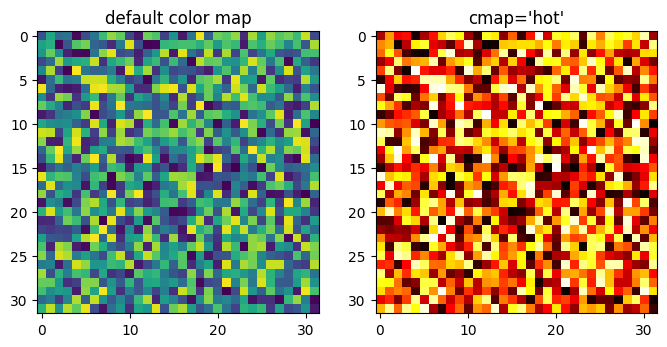

In [34]:
np.random.seed(12345678)
heat_values = np.random.random_sample(size=(32, 32))

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(8,4))
ax1.imshow(heat_values)
ax1.set_title("default color map")
ax2.imshow(heat_values, cmap='hot')
ax2.set_title("cmap='hot'")
plt.show()

### Exercise (Heatmaps) 1.

Manipulate the uniform random data source of the $32\times 32$ heatmap so that the order of the pixels remain the same, but the values shift towards warm.

[[0.24580423 0.59642861 0.35879163 ... 0.68295495 0.91531099 0.22258966]
 [0.57268435 0.63025742 0.01339212 ... 0.70973061 0.28023516 0.87187908]
 [0.52205146 0.76227201 0.48585342 ... 0.26164419 0.69834352 0.70172878]
 ...
 [0.69772534 0.49797355 0.56074462 ... 0.07123    0.97279936 0.7064134 ]
 [0.33857118 0.41686883 0.17335394 ... 0.84197129 0.42958549 0.01935263]
 [0.63741233 0.90090152 0.51235951 ... 0.26730868 0.5130753  0.07243458]]
[[0.49578648 0.7722879  0.59899218 ... 0.82641088 0.95671887 0.47179408]
 [0.75675911 0.79388753 0.11572432 ... 0.84245511 0.52937242 0.93374465]
 [0.72253129 0.87308191 0.69703186 ... 0.51151167 0.8356695  0.83769253]
 ...
 [0.83529955 0.70567241 0.74882883 ... 0.26688949 0.98630591 0.84048403]
 [0.58186869 0.6456538  0.41635795 ... 0.91758993 0.65542771 0.13911372]
 [0.79838107 0.94915832 0.71579292 ... 0.51701903 0.71629275 0.26913673]]


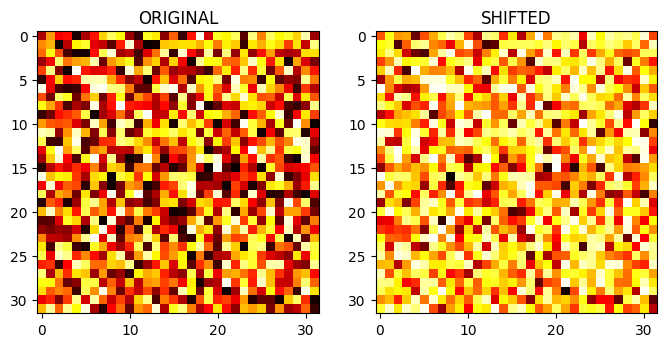

In [35]:
np.random.seed(12345678)
vals1 = np.random.random_sample(size=(32, 32))

print(vals1)
# vals2 = vals1 + 1000
# vals2 = vals1 * 1000 + 100
vals2 = vals1 ** 0.5
print(vals2)

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(8,4))
ax1.imshow(vals1, cmap='hot')
ax1.set_title("ORIGINAL")
ax2.imshow(vals2, cmap='hot')
ax2.set_title("SHIFTED")
plt.show()

### Exercise (Heatmaps) 2.

Display each of the color maps named `turbo`, `coolwarm`, `seismic`, `hsv` and `terrain` in a separate heatmap each.

In [36]:
# heat_values = np.tile(np.arange(0, 101).reshape(-1, 1), (1, 10))
heat_values = np.repeat(np.arange(0, 101)[:, None], 10, axis=1)
print(heat_values)

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [ 98  98  98 ...  98  98  98]
 [ 99  99  99 ...  99  99  99]
 [100 100 100 ... 100 100 100]]


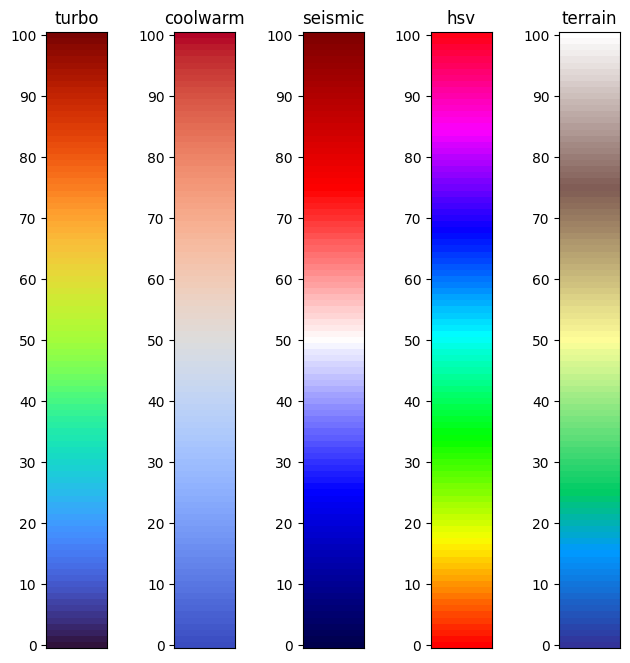

In [37]:
cmap_names = ['turbo', 'coolwarm', 'seismic', 'hsv', 'terrain']

fg, axs = plt.subplots(1, len(cmap_names), figsize=(8,8))
for ax, name in zip(axs, cmap_names):
  ax.imshow(heat_values, cmap=name)
  ax.set_yticks(np.arange(0, 101, 10))
  ax.invert_yaxis()
  ax.set_xticks([])
  ax.set_title(name)

plt.show()